In [1]:
import matplotlib.pyplot as plt
import boto3
import botocore
from botocore import UNSIGNED
from botocore.client import Config

In [ ]:
https://sentinelhub-py.readthedocs.io/en/latest/examples/aws_request.html
https://cloud.google.com/storage/docs/public-datasets/sentinel-2
https://medium.com/@anttilip/seeing-earth-from-space-from-raw-satellite-data-to-beautiful-high-resolution-images-feb522adfa3f
https://hatarilabs.com/ih-en/sentinel2-images-explotarion-and-processing-with-python-and-rasterio
https://console.cloud.google.com/storage/browser/_details/gcp-public-data-sentinel-2/L2/tiles/31/P/BL/S2A_MSIL2A_20181215T101421_N0211_R022_T31PBL_20181215T124427.SAFE/GRANULE/L2A_T31PBL_A018180_20181215T102133/IMG_DATA/R10m/T31PBL_20181215T101421_AOT_10m.jp2
https://geopyspark.readthedocs.io/en/latest/tutorials/reading-in-sentinel-data.html
https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/naming-convention
https://alexwlchan.net/2017/07/listing-s3-keys/
https://docs.aws.amazon.com/AmazonS3/latest/userguide/access-bucket-intro.html
https://www.tandfonline.com/doi/full/10.1080/20964471.2017.1407489

In [2]:
import wget
path = 'http://sentinel-cogs.s3.amazonaws.com/sentinel-s2-l2a-cogs/1/C/CV/2019/10/S2B_1CCV_20191009_0_L2A/B02.tif'
ada = wget.download(path)

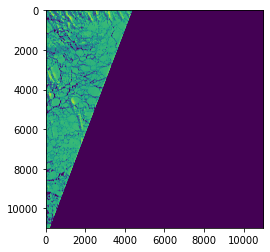

In [ ]:
img = plt.imread('B02.tif')
plt.imshow(img)
plt.show()

In [3]:
s3 = boto3.client('s3',region_name='eu-central-1' ,config=Config(signature_version=UNSIGNED))

In [58]:
s3.list_objects_v2(Bucket='sentinel-cogs',Prefix='sentinel-s2-l2a-cogs/31/P/BK/')

In [ ]:
# LEGACY
# def get_s3_keys():

#     keys = []
#     resp = s3.list_objects_v2(Bucket='sentinel-cogs')

#     for obj in resp['Contents']:
#         keys.append(obj['Key'])
    
#     return keys


### For Checking the tile name and size

In [ ]:
region_no,region_letter,tile

In [59]:
def get_tiles():

    tile = []
    kwargs = {'Bucket':'sentinel-cogs','Prefix':'sentinel-s2-l2a-cogs/31/P/BK/'}
    counter = 0
    size = 0

    while True:

        tiles = s3.list_objects_v2(**kwargs)

        for obj in tiles['Contents']:
            tile.append(obj['Key'])
            size += obj['Size'] 

        try:
            kwargs['ContinuationToken'] = tiles['NextContinuationToken']

        except KeyError:
            break

        counter += 1

    return tile,size/(1000**2)

In [60]:
keys,size = get_tiles()

In [63]:
keys[11807]

'sentinel-s2-l2a-cogs/31/P/BK/2021/8/S2A_31PBK_20210801_0_L2A/WVP.tif'

In [64]:
print(len(keys),size)

11808 528655.412939


### For checking the months

In [ ]:
def check_months():

    kwargs = {'Bucket':'sentinel-cogs'}
    months = []

    while True:

        tiles = s3.list_objects_v2(**kwargs)

        for obj in tiles['Contents']:

            key = obj['Key']
            for j in range(len(key)):
                if key[j] == "_":
                    if key[j-11:j-9] == "20":
                        if int(key[j-11:j-7]) < 2017:
                            return months
                        # print(key[j-11:j-7])
                        # print(key[j-6:j-4])
                        if key[j-11:j-4].replace('/','_') not in months:
                            months.append(key[j-11:j-4].replace('/','_'))
                else:
                    pass


        try:
            kwargs['ContinuationToken'] = tiles['NextContinuationToken']
        except KeyError:
            break

    return months

In [ ]:
check_months()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d4adc63-4053-44fd-8ea4-abefc4b72b22' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>